In [151]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [152]:
# Upload dataset
df = pd.read_csv("salary.csv")

In [153]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [154]:
df = df.drop('fnlwgt', axis=1)
df = df.drop('capital-gain', axis=1)
df = df.drop('capital-loss', axis=1)

In [155]:
print(df.columns)

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'salary'],
      dtype='object')


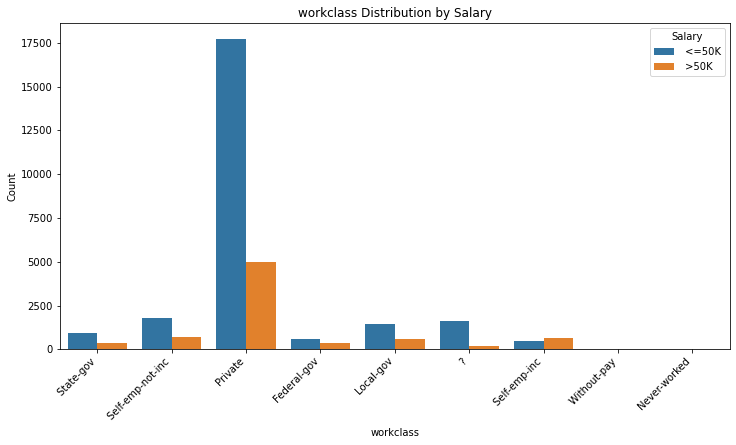

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for workclass by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="workclass", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("workclass")
plt.ylabel("Count")
plt.title("workclass Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()


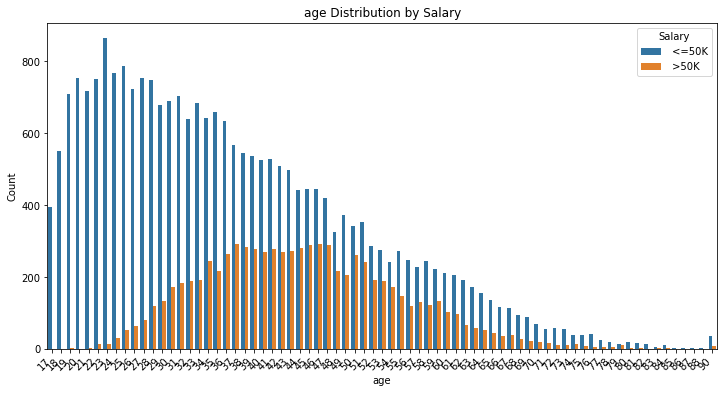

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for age by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="age", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("age")
plt.ylabel("Count")
plt.title("age Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()


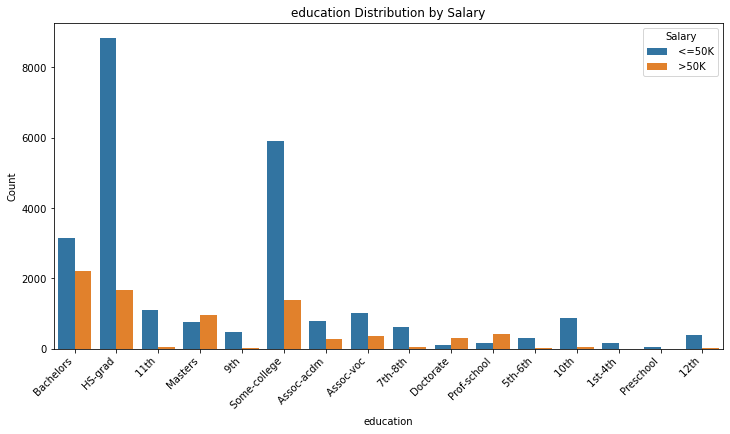

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar plot for education by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="education", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("education")
plt.ylabel("Count")
plt.title("education Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()


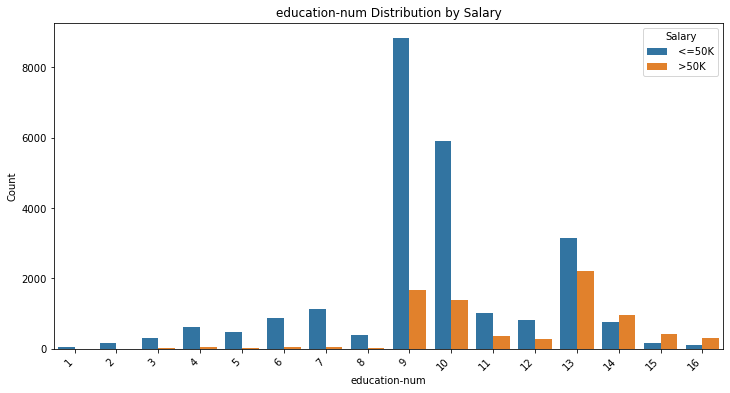

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for education-num by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="education-num", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("education-num")
plt.ylabel("Count")
plt.title("education-num Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()

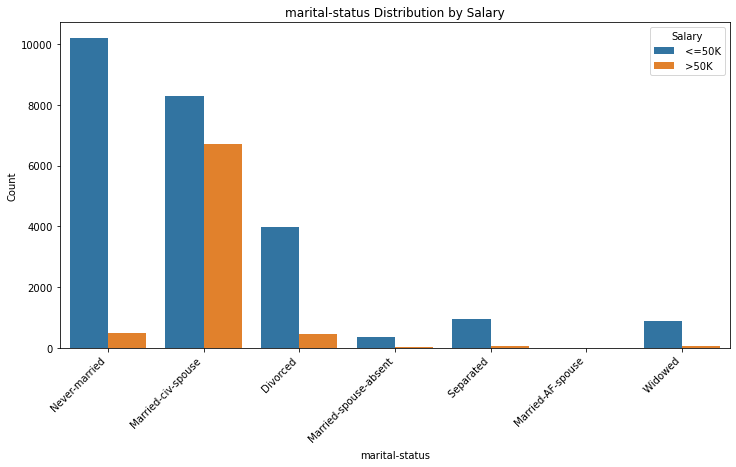

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for maritial-status by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="marital-status", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("marital-status")
plt.ylabel("Count")
plt.title("marital-status Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()

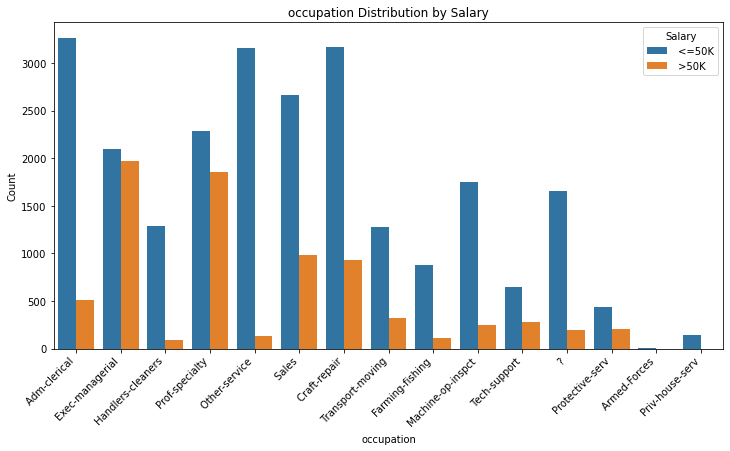

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar plot for occupation by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="occupation", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("occupation")
plt.ylabel("Count")
plt.title("occupation Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()

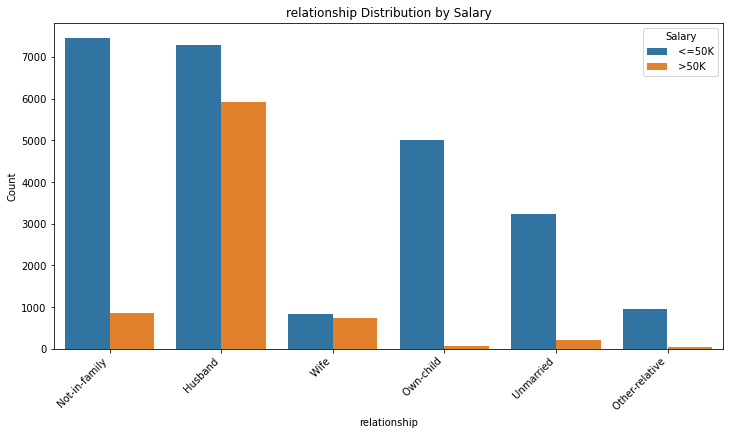

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar plot for relationship by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="relationship", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("relationship")
plt.ylabel("Count")
plt.title("relationship Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()

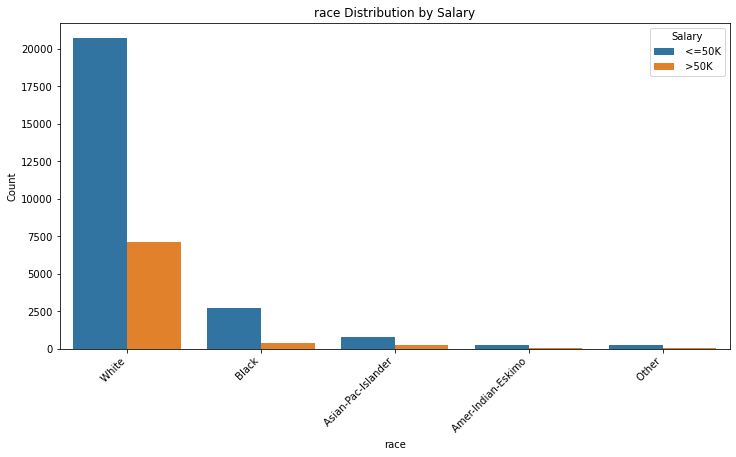

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for race by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="race", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("race")
plt.ylabel("Count")
plt.title("race Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()

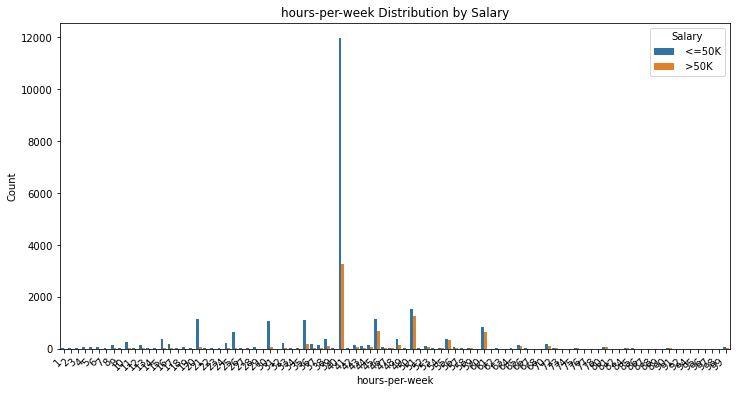

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar plot for hours-perpweek by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="hours-per-week", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("hours-per-week")
plt.ylabel("Count")
plt.title("hours-per-week Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()

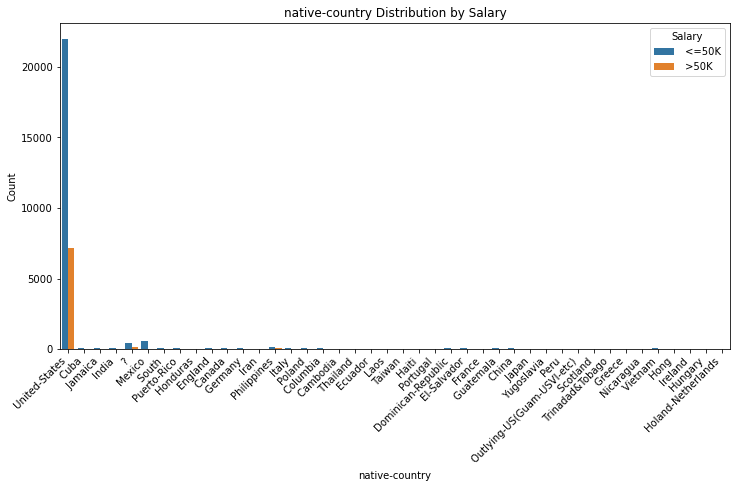

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a bar plot for native-country by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="native-country", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("native-country")
plt.ylabel("Count")
plt.title("native-country Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()

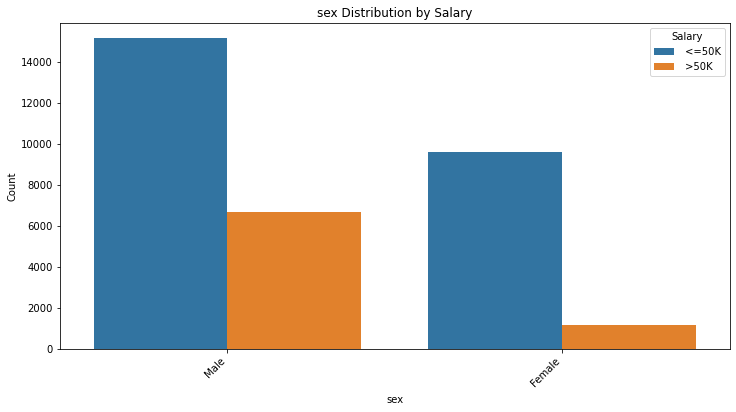

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for sex by salary
plt.figure(figsize=(12, 6))
sns.countplot(x="sex", hue="salary", data=df)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.xlabel("sex")
plt.ylabel("Count")
plt.title("sex Distribution by Salary")
plt.legend(title="Salary", loc="upper right")
plt.show()

In [168]:
#clearly the dataset contains a majority of white americans to make this more fair either only use white americans in the model or not include race and country as features in the model. 

In [169]:
df.isnull().any()


age               False
workclass         False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [170]:
print(df['occupation'].unique())


[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [171]:
import pandas as pd

df.replace(' ?', np.nan, inplace=True)

In [172]:
df.isnull().any()


age               False
workclass          True
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [173]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [174]:
df.dropna(inplace=True)

In [175]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [176]:
from collections import Counter
print(sorted(Counter(df['salary']).items()))
#shows its an imbalanced data set

[(' <=50K', 22654), (' >50K', 7508)]


In [177]:
count_class_0, count_class_1 = df.salary.value_counts()

In [178]:
count_class_0, count_class_1

(22654, 7508)

In [179]:
salary_1 = df[df['salary']== ' >50K']
salary_0 = df[df['salary']== ' <=50K']

In [180]:
salary_0_under =salary_0.sample(count_class_1)
df_test_under = pd.concat([salary_0_under, salary_1], axis = 0)
df_test_under.shape

(15016, 12)

In [181]:
print('Random under-sampling')
print(df_test_under.salary.value_counts())

Random under-sampling
 <=50K    7508
 >50K     7508
Name: salary, dtype: int64


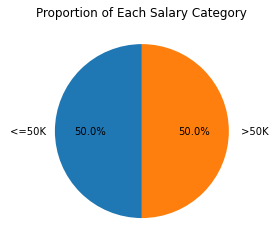

In [182]:
# pie chart
plt.pie(df_test_under['salary'].value_counts(), labels=df_test_under['salary'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Each Salary Category')
plt.show()

In [184]:
df_test_under

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
12127,26,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,45,United-States,<=50K
23974,39,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,45,United-States,<=50K
28285,27,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,40,United-States,<=50K
11792,32,Federal-gov,HS-grad,9,Separated,Machine-op-inspct,Not-in-family,Black,Male,46,United-States,<=50K
10572,23,Private,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,45,United-States,>50K
32545,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,United-States,>50K
32554,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K


In [187]:
# Encode categorical variables
label_encoder = LabelEncoder()
df_test_under['education'] = label_encoder.fit_transform(df_test_under['education'])
df_test_under['sex'] = label_encoder.fit_transform(df_test_under['sex'])
df_test_under['salary'] = label_encoder.fit_transform(df_test_under['salary'])
df_test_under['native-country'] = label_encoder.fit_transform(df_test_under['native-country'])
df_test_under['race'] = label_encoder.fit_transform(df_test_under['race'])
df_test_under['relationship'] = label_encoder.fit_transform(df_test_under['relationship'])
df_test_under['occupation'] = label_encoder.fit_transform(df_test_under['occupation'])
df_test_under['marital-status'] = label_encoder.fit_transform(df_test_under['marital-status'])
df_test_under['workclass'] = label_encoder.fit_transform(df_test_under['workclass'])

In [189]:
# Define independent and dependent variables
X = df_test_under[['age','workclass', 'education']]
y = df_test_under['salary']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [190]:
#For logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [191]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_train_score = lr_model.score(X_train, y_train)
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
lr_test_score = lr_model.score(X_test, y_test)

In [192]:
print(f'Logistic Regression: Training Score : {lr_train_score:.2f}, Mean Accuracy : {lr_scores.mean()}, Standard Deviation : {lr_scores.std()}')
print(f'Test Score: {lr_test_score:.2f}')

Logistic Regression: Training Score : 0.63, Mean Accuracy : 0.6334501038287209, Standard Deviation : 0.0030157146175445134
Test Score: 0.64


In [193]:
logistic_model.fit(X_train, y_train)
coefficients = logistic_model.coef_
print(f'Logistic Regression Coefficients: {coefficients}')


Logistic Regression Coefficients: [[ 0.05202156 -0.00374742  0.04695567]]


In [194]:
#For Naive Bayes:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [195]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_train_score = nb_model.score(X_train, y_train)
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
nb_test_score = nb_model.score(X_test, y_test)

In [196]:
print(f'Naive Bayes: Training Score : {nb_train_score:.2f}, Mean Accuracy : {nb_scores.mean()}, Standard Deviation : {nb_scores.std()}')
print(f'Test Score: {nb_test_score:.2f}')

Naive Bayes: Training Score : 0.67, Mean Accuracy : 0.6671672205468948, Standard Deviation : 0.008633229905311474
Test Score: 0.68


In [198]:
#For support vector machine
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [199]:
svm_model = SVC(kernel = 'linear', random_state=0)
svm_model.fit(X_train, y_train)
svm_train_score = svm_model.score(X_train, y_train)
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
svm_test_score = svm_model.score(X_test, y_test)

In [200]:
print(f'Support Vector Machine: Training Score : {svm_train_score:.2f}, Mean Accuracy - {svm_scores.mean()}, Standard Deviation : {svm_scores.std()}')
print(f'Test Score: {svm_test_score:.2f}')

Support Vector Machine: Training Score : 0.64, Mean Accuracy - 0.6419413978433147, Standard Deviation : 0.00167051402176232
Test Score: 0.64


In [201]:
svm_model.fit(X_train, y_train)
coefficients = svm_model.coef_
print(f'SVM Coefficients: {coefficients}')


SVM Coefficients: [[ 0.0692578  -0.0086642   0.04330633]]


In [202]:
#For random forest
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [203]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_test_score = rf_model.score(X_test, y_test)

In [204]:
print(f'Random Forest: Training Score : {rf_train_score:.2f}, Mean Accuracy : {rf_scores.mean()}, Standard Deviation : {rf_scores.std()}')
print(f'Test Score: {rf_test_score:.2f}')

Random Forest: Training Score : 0.77, Mean Accuracy : 0.6975543337966037, Standard Deviation : 0.009318351353112288
Test Score: 0.69


In [205]:
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
print(f'Random Forest Feature Importances: {importances}')


Random Forest Feature Importances: [0.6286936  0.06649252 0.30481388]


In [206]:
#for neural network
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [207]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_train_score = nn_model.score(X_train, y_train)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
nn_test_score = nn_model.score(X_test, y_test)

In [208]:
print(f'Neural Network: Training Score : {nn_train_score:.2f}, Mean Accuracy : {nn_scores.mean()}, Standard Deviation : {nn_scores.std()}')
print(f'Test Score: {nn_test_score:.2f}')

Neural Network: Training Score : 0.68, Mean Accuracy : 0.6767402875187586, Standard Deviation : 0.008454502847144404
Test Score: 0.69


In [210]:
#from the models we can tell that age and education correlate better
#with salary. workclass variable is either very small or negatively 
#impacts the model.

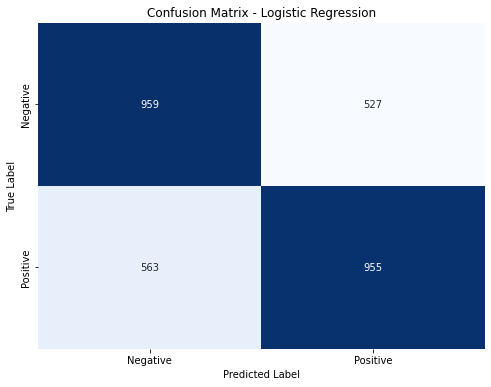

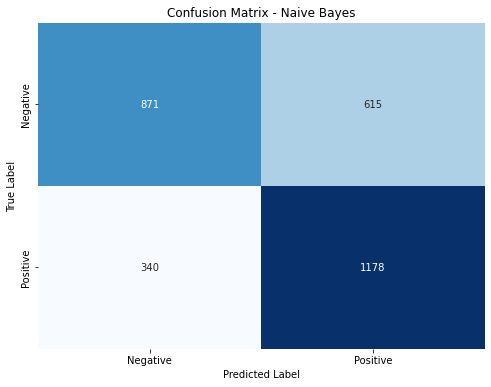

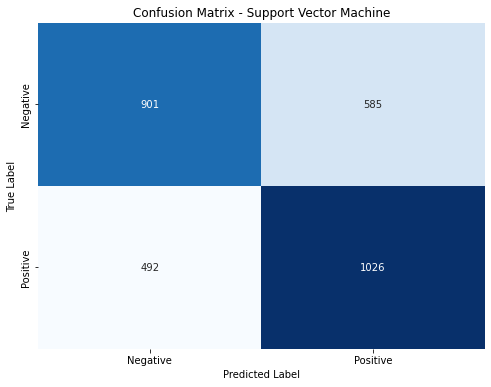

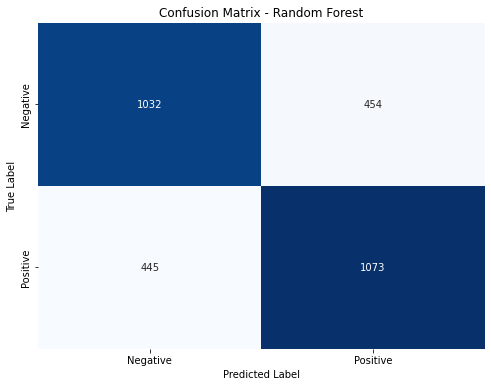

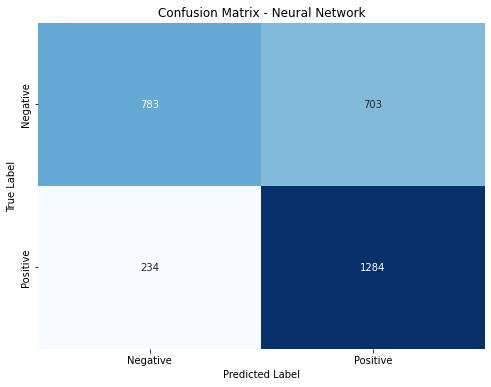

In [211]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = [
    ('Logistic Regression', logistic_model),
    ('Naive Bayes', nb_model),
    ('Support Vector Machine', svm_model),
    ('Random Forest', rf_model),
    ('Neural Network', nn_model)
]

for name, model in models:
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [212]:
#Logistic regression
#TN = 959
#FP = 527
#FN = 563
#TP = 955

In [213]:
#Naive bayes 
#TN = 871
#FP = 615
#FN = 340
#TP = 1178

In [214]:
#SVM
#TN = 901
#FP = 585
#FN = 492
#TP = 1026

In [215]:
#Random Forest
#TN = 1026
#FP = 460
#FN = 447
#TP = 1071

In [216]:
#Neural Network
#TN = 750
#FP = 736
#FN = 196
#TP = 1322

In [217]:
#Models can definatley be improved. will replace the workclass variable
#From the evaluation of the models 
#TOP 3 MODELS:
#1- 

In [218]:
#Accuracy: (TP + TN) / (TP + TN + FP + FN)
#LR = 0.645
#NB = 0.659
#SVM = 0.656
#RF = 0.697
#NN = 0.685

In [219]:
#Precision: TP / (TP + FP)
#LR = 0.644
#NB = 0.657
#SVM = 0.637
#RF = 0.699
#NN = 0.643

In [220]:
#Recall (Sensitivity): TP / (TP + FN)
#LR = 0.629
#NB = 0.776
#SVM = 0.676
#RF = 0.706
#NN = 0.871

In [221]:
#F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
#LR = 0.636
#NB = 0.712
#SVM = 0.655
#RF = 0.702
#NN = 0.744

In [222]:
#Best model for accuracy is Random forest however they all are very close 
#Best model for Precision is also RF however again all close
#Best model for Recall is Neural network model
#Best model for F1 best precision and recall combined 1st - NN 
#followed by NB and then closely by RF.
#since accuracy they are all fairly close we can base top 3 on the
#F1 score. 
#TOP 3
#1 - NN  2- NB  3-RF

In [223]:
#possibly the models need more data. will perform oversampling now

In [225]:
#oversampling

# Oversampling the minority class to match the majority class
salary_1_over = salary_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([salary_1_over, salary_0], axis = 0)
df_test_over.shape

(45308, 12)

In [226]:
print('Random over-sampling')
print(df_test_over.salary.value_counts())

Random over-sampling
 >50K     22654
 <=50K    22654
Name: salary, dtype: int64


In [ ]:
#Now will perform the top 3 models again on oversampled model

In [231]:
# Encode categorical variables
label_encoder = LabelEncoder()
df_test_over['education'] = label_encoder.fit_transform(df_test_over['education'])
df_test_over['sex'] = label_encoder.fit_transform(df_test_over['sex'])
df_test_over['salary'] = label_encoder.fit_transform(df_test_over['salary'])
df_test_over['native-country'] = label_encoder.fit_transform(df_test_over['native-country'])
df_test_over['race'] = label_encoder.fit_transform(df_test_over['race'])
df_test_over['relationship'] = label_encoder.fit_transform(df_test_over['relationship'])
df_test_over['occupation'] = label_encoder.fit_transform(df_test_over['occupation'])
df_test_over['marital-status'] = label_encoder.fit_transform(df_test_over['marital-status'])
df_test_over['workclass'] = label_encoder.fit_transform(df_test_over['workclass'])

In [232]:
#age, education, occupation, relationship, hours-per-week

In [233]:
# Define independent and dependent variables
X = df_test_over[['age', 'education', 'occupation', 'relationship', 'hours-per-week']]
y = df_test_over['salary']

In [234]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [235]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_train_score = nn_model.score(X_train, y_train)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
nn_test_score = nn_model.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Train

In [ ]:
#Added hyperparameter max_iter - 500

In [237]:
nn_model = MLPClassifier(max_iter=500) #increased iterations to a higher value
nn_model.fit(X_train, y_train)
nn_train_score = nn_model.score(X_train, y_train)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
nn_test_score = nn_model.score(X_te, y_test)

In [238]:
print(f'Neural Network: Training Score : {nn_train_score:.2f}, Mean Accuracy : {nn_scores.mean()}, Standard Deviation : {nn_scores.std()}')
print(f'Test Score: {nn_test_score:.2f}')

Neural Network: Training Score : 0.79, Mean Accuracy : 0.7875351101935582, Standard Deviation : 0.004793863573549402
Test Score: 0.80


In [239]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_train_score = nb_model.score(X_train, y_train)
nb_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
nb_test_score = nb_model.score(X_test, y_test)

In [240]:
print(f'Naive Bayes: Training Score : {nb_train_score:.2f}, Mean Accuracy : {nb_scores.mean()}, Standard Deviation : {nb_scores.std()}')
print(f'Test Score: {nb_test_score:.2f}')

Naive Bayes: Training Score : 0.72, Mean Accuracy : 0.718313808801214, Standard Deviation : 0.004274408228683789
Test Score: 0.72


In [241]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_test_score = rf_model.score(X_test, y_test)

In [242]:
print(f'Random Forest: Training Score : {rf_train_score:.2f}, Mean Accuracy : {rf_scores.mean()}, Standard Deviation : {rf_scores.std()}')
print(f'Test Score: {rf_test_score:.2f}')

Random Forest: Training Score : 0.94, Mean Accuracy : 0.8677922947754981, Standard Deviation : 0.0012216326701332372
Test Score: 0.88


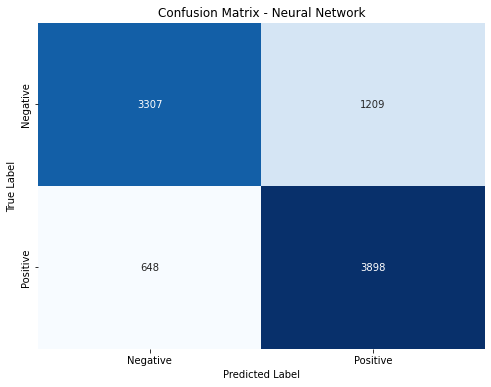

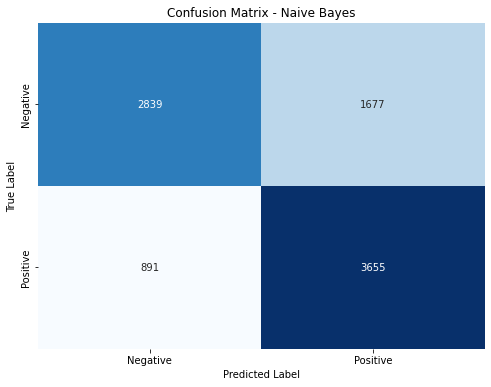

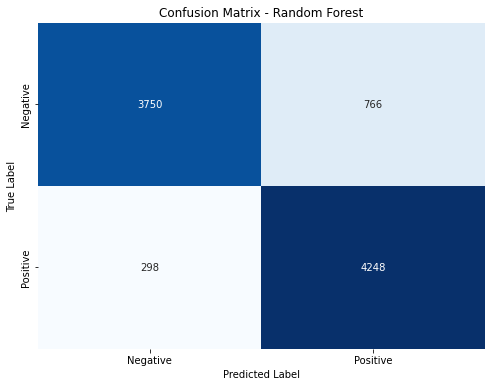

In [243]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = [
    ('Neural Network', nn_model),
    ('Naive Bayes', nb_model),
    ('Random Forest', rf_model)
    
]

for name, model in models:
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [ ]:
#Removing workclass and adding other additional features definitely improved the models

In [ ]:
#using hyperparametres in the models to see if it improves the scores.

In [244]:
nn_model = MLPClassifier(solver = 'adam', max_iter=500) #increased iterations to a higher value
nn_model.fit(X_train, y_train)
nn_train_score = nn_model.score(X_train, y_train)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
nn_test_score = nn_model.score(X_test, y_test)

In [245]:
print(f'Neural Network: Training Score : {nn_train_score:.2f}, Mean Accuracy : {nn_scores.mean()}, Standard Deviation : {nn_scores.std()}')
print(f'Test Score: {nn_test_score:.2f}')

Neural Network: Training Score : 0.79, Mean Accuracy : 0.7856866440555417, Standard Deviation : 0.005637758877226539
Test Score: 0.79


In [246]:
nn_model = MLPClassifier(hidden_layer_sizes =(100, 50), max_iter=500) #increased iterations to a higher value
nn_model.fit(X_train, y_train)
nn_train_score = nn_model.score(X_train, y_train)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
nn_test_score = nn_model.score(X_test, y_test)

In [247]:
print(f'Neural Network: Training Score : {nn_train_score:.2f}, Mean Accuracy : {nn_scores.mean()}, Standard Deviation : {nn_scores.std()}')
print(f'Test Score: {nn_test_score:.2f}')

Neural Network: Training Score : 0.81, Mean Accuracy : 0.7965842879636191, Standard Deviation : 0.005928341821282977
Test Score: 0.80


In [248]:
nn_model = MLPClassifier(learning_rate_init = 0.001, max_iter=500) #increased iterations to a higher value
nn_model.fit(X_train, y_train)
nn_train_score = nn_model.score(X_train, y_train)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
nn_test_score = nn_model.score(X_test, y_test)

In [249]:
print(f'Neural Network: Training Score : {nn_train_score:.2f}, Mean Accuracy : {nn_scores.mean()}, Standard Deviation : {nn_scores.std()}')
print(f'Test Score: {nn_test_score:.2f}')

Neural Network: Training Score : 0.80, Mean Accuracy : 0.7883630046474901, Standard Deviation : 0.003634954698935294
Test Score: 0.80


In [268]:
nn_model = MLPClassifier(learning_rate_init = 0.005, max_iter=500) #increased iterations to a higher value
nn_model.fit(X_train, y_train)
nn_train_score = nn_model.score(X_train, y_train)
nn_scores = cross_val_score(nn_model, X_train, y_train, cv=5, scoring='accuracy')
nn_test_score = nn_model.score(X_test, y_test)

In [269]:
print(f'Neural Network: Training Score : {nn_train_score:.2f}, Mean Accuracy : {nn_scores.mean()}, Standard Deviation : {nn_scores.std()}')
print(f'Test Score: {nn_test_score:.2f}')

Neural Network: Training Score : 0.79, Mean Accuracy : 0.7907355288006432, Standard Deviation : 0.00295486007685491
Test Score: 0.77


In [253]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_test_score = rf_model.score(X_test, y_test)

In [254]:
print(f'Random Forest: Training Score : {rf_train_score:.2f}, Mean Accuracy : {rf_scores.mean()}, Standard Deviation : {rf_scores.std()}')
print(f'Test Score: {rf_test_score:.2f}')

Random Forest: Training Score : 0.94, Mean Accuracy : 0.8680681834830963, Standard Deviation : 0.0005599118402979149
Test Score: 0.88


In [255]:
rf_model = RandomForestClassifier(min_samples_leaf = 2)
rf_model.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_test_score = rf_model.score(X_test, y_test)

In [256]:
print(f'Random Forest: Training Score : {rf_train_score:.2f}, Mean Accuracy : {rf_scores.mean()}, Standard Deviation : {rf_scores.std()}')
print(f'Test Score: {rf_test_score:.2f}')

Random Forest: Training Score : 0.92, Mean Accuracy : 0.8538321404617045, Standard Deviation : 0.001948648041237471
Test Score: 0.87


In [257]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_test_score = rf_model.score(X_test, y_test)

In [ ]:
print(f'Random Forest: Training Score : {rf_train_score:.2f}, Mean Accuracy : {rf_scores.mean()}, Standard Deviation : {rf_scores.std()}')
print(f'Test Score: {rf_test_score:.2f}')

Random Forest: Training Score : 0.94, Mean Accuracy : 0.8688131556790235, Standard Deviation : 0.0014868255546399223
Test Score: 0.88


In [ ]:
#The tuned hyperparametres didnt improve the scores 

In [ ]:
#Lets try ensembling the Random Forest and Neural network models together

In [276]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize individual models
rf_model = RandomForestClassifier()
nn_model = MLPClassifier(max_iter=500)

# Create a stacking classifier
models = [
    ('Random Forest', rf_model),
    ('Neural Network', nn_model)
]

stacking_model = StackingClassifier(estimators=models, final_estimator=MLPClassifier())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predictions on the test set
stacking_predictions = stacking_model.predict(X_test)

# Evaluate the stacking model
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

print(f'Stacking Model Accuracy: {stacking_accuracy}')

#cross-validation to evaluate the stacking model
stacking_cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Stacking Model Cross-Validation Mean Accuracy: {stacking_cv_scores.mean()}')


Stacking Model Accuracy: 0.8786139924961377
Stacking Model Cross-Validation Mean Accuracy: 0.8696132698445922


In [277]:
print(f'Stacking Model: Training Score : {stacking_model.score(X_train, y_train):.2f}, Mean Accuracy (Cross-Validation) : {stacking_cv_scores.mean():.4f}, Standard Deviation (Cross-Validation) : {stacking_cv_scores.std():.4f}')
print(f'Test Score: {stacking_accuracy:.2f}')


Stacking Model: Training Score : 0.94, Mean Accuracy (Cross-Validation) : 0.8696, Standard Deviation (Cross-Validation) : 0.0034
Test Score: 0.88


In [278]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_train_score = rf_model.score(X_train, y_train)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_test_score = rf_model.score(X_test, y_test)

In [279]:
print(f'Random Forest: Training Score : {rf_train_score:.2f}, Mean Accuracy : {rf_scores.mean()}, Standard Deviation : {rf_scores.std()}')
print(f'Test Score: {rf_test_score:.2f}')

Random Forest: Training Score : 0.94, Mean Accuracy : 0.8657784369782275, Standard Deviation : 0.0030744098691224873
Test Score: 0.88


In [ ]:
#as we saw it didnt need any hyperparametres. 
#hyperparametres either didnt change the score or made it lower.

In [ ]:
#will use a different random_state so that test set is new 

In [261]:
#change random state to ensure different test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Create and train the RandomForestClassifier on the entire dataset
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

rf_train_score = rf_model.score(X_train, y_train)
print(f'Random Forest Training Score: {rf_train_score:.2f}')

from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forest Cross-Validation Mean Accuracy: {rf_scores.mean():.2f}')


rf_test_score = rf_model.score(X_test, y_test)
print(f'Random Forest Test Score (Generalization Error Estimate): {rf_test_score:.2f}')


Random Forest Training Score: 0.94
Random Forest Cross-Validation Mean Accuracy: 0.87
Random Forest Test Score (Generalization Error Estimate): 0.94


In [300]:
#change random state to ensure different test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


# Initialize individual models
rf_model = RandomForestClassifier()
nn_model = MLPClassifier(max_iter=500)

# Create a stacking classifier
models = [
    ('Random Forest', rf_model),
    ('Neural Network', nn_model)
]

stacking_model = StackingClassifier(estimators=models, final_estimator=MLPClassifier())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predictions on the test set
stacking_predictions = stacking_model.predict(X_test)

# Evaluate the stacking model
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

print(f'Stacking Model Accuracy: {stacking_accuracy}')

#cross-validation to evaluate the stacking model
stacking_cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Stacking Model Cross-Validation Mean Accuracy: {stacking_cv_scores.mean()}')
print(f'Stacking Model Test Score (Generalization Error Estimate): {stacking_accuracy:.2f}')




Stacking Model Accuracy: 0.7879993369799436
Stacking Model Cross-Validation Mean Accuracy: 0.7733430103347798
Stacking Model Test Score (Generalization Error Estimate): 0.79
